<a href="https://colab.research.google.com/github/ayushranjan6456/HydrogenPrediction/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [6]:
cyc1 = pd.read_csv('/content/gdrive/My Drive/dataset/cycle1.csv')
cyc2 = pd.read_csv('/content/gdrive/My Drive/dataset/cycle2.csv')
cyc3 = pd.read_csv('/content/gdrive/My Drive/dataset/cycle3.csv')
cyc4 = pd.read_csv('/content/gdrive/My Drive/dataset/cycle4.csv')
cyc5 = pd.read_csv('/content/gdrive/My Drive/dataset/cycle5.csv')
cyc6 = pd.read_csv('/content/gdrive/My Drive/dataset/cycle6.csv')
cyc7 = pd.read_csv('/content/gdrive/My Drive/dataset/cycle7.csv')
cyc1

,Time,pH,VFA,COD,Gas
0,0,6.00,3.31,11.20,0.0
1,8,5.89,3.45,10.90,8.4
2,16,5.81,3.65,9.70,16.1
3,24,5.75,3.85,9.15,20.1
4,32,5.30,4.43,8.20,30.9
5,40,5.25,4.55,7.75,34.5
6,48,5.20,4.63,6.45,38.0


Text(0.5, 1.0, 'CYCLE 6')

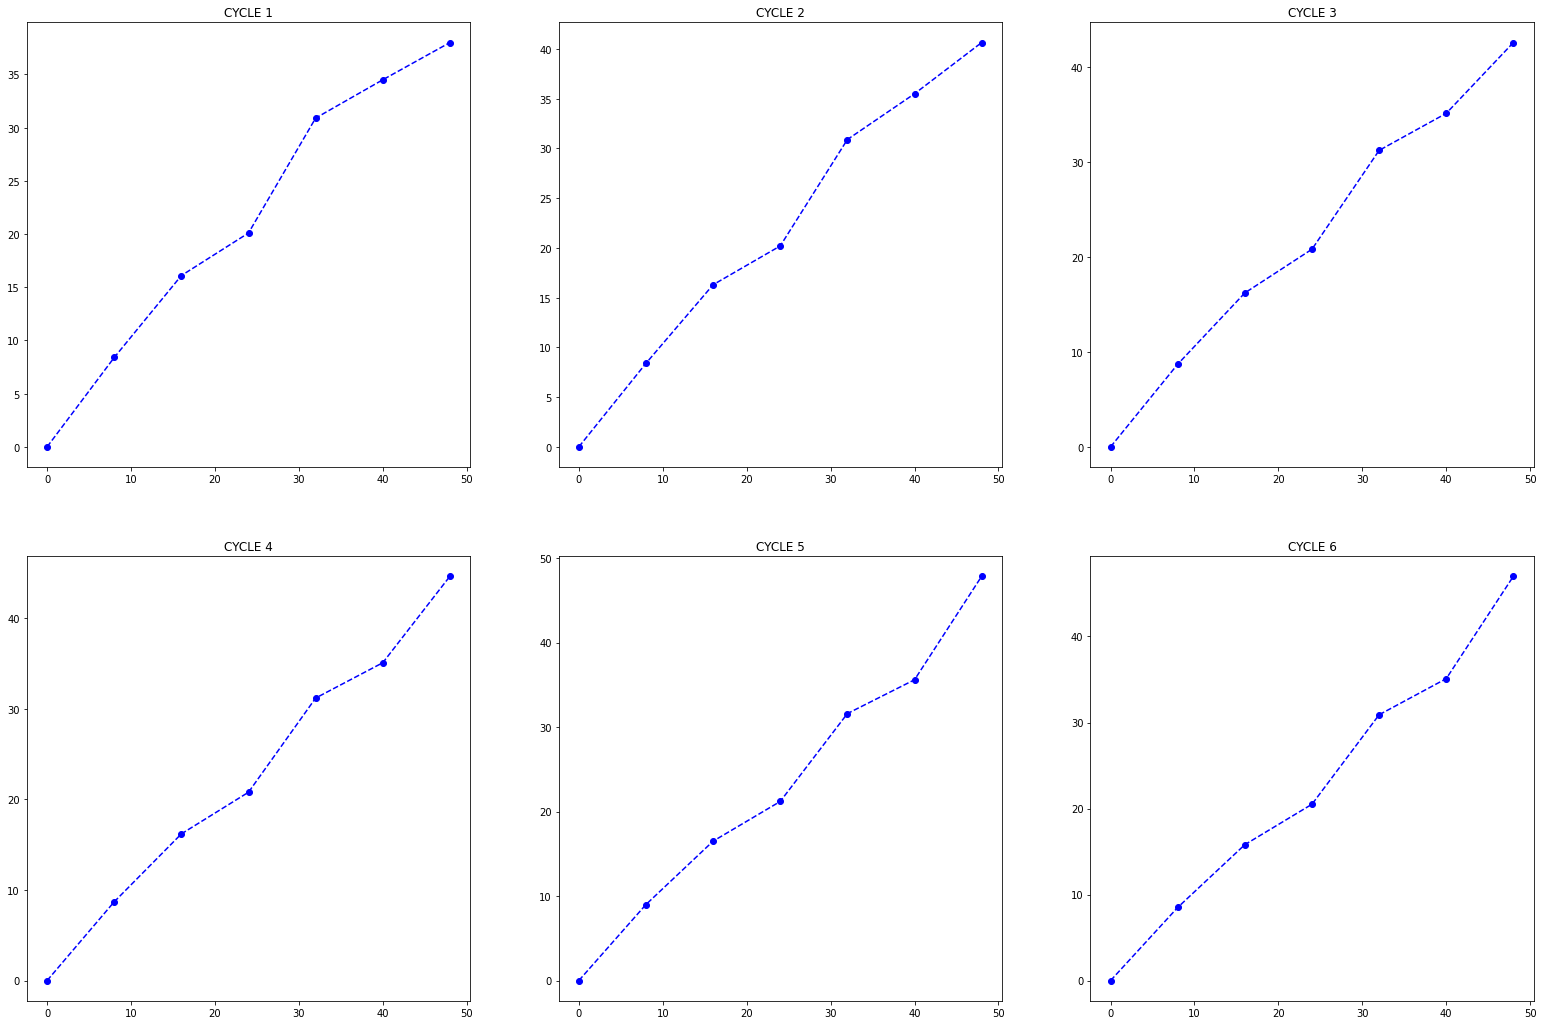

In [ ]:
f = plt.figure()
f.set_figwidth(27)
f.set_figheight(18)

x1=cyc1['Time']
y1=cyc1['Gas']
x2=cyc2['Time']
y2=cyc2['Gas']
x3=cyc3['Time']
y3=cyc3['Gas']
x4=cyc4['Time']
y4=cyc4['Gas']
x5=cyc5['Time']
y5=cyc5['Gas']
x6=cyc6['Time']
y6=cyc6['Gas']

plt.subplot(2, 3, 1)
plt.plot(x1, y1, 'bo--')
plt.title("CYCLE 1")

plt.subplot(2, 3, 2)
plt.plot(x2, y2, 'bo--')
plt.title("CYCLE 2")

plt.subplot(2, 3, 3)
plt.plot(x3, y3, 'bo--')
plt.title("CYCLE 3")

plt.subplot(2, 3, 4)
plt.plot(x4, y4, 'bo--')
plt.title("CYCLE 4")

plt.subplot(2, 3, 5)
plt.plot(x5, y5, 'bo--')
plt.title("CYCLE 5")

plt.subplot(2, 3, 6)
plt.plot(x6, y6, 'bo--')
plt.title("CYCLE 6")


# Interpolate using scipy

* Use interp1d for 1D interpolation
* create 200 data pts b/w 0 and 48
* use the interpolation function to get y data 




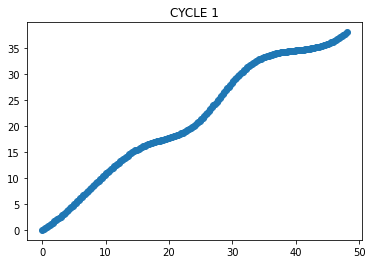

In [ ]:
y_f = interp1d(x1, y1, 'cubic')

x1_n = np.linspace(0,48,200)
y1_n = y_f(x1_n)


plt.scatter(x1_n,y1_n)
plt.title("CYCLE 1")
plt.show()

# Testing 

In [ ]:
xc = [7]
yc = y_f(xc)
yc

array([7.20898438])

# Expanding all parameters of Cycle 1

In [ ]:
cyc1


,Time,pH,VFA,COD,Gas
0,0,6.00,3.31,11.20,0.0
1,8,5.89,3.45,10.90,8.4
2,16,5.81,3.65,9.70,16.1
3,24,5.75,3.85,9.15,20.1
4,32,5.30,4.43,8.20,30.9
5,40,5.25,4.55,7.75,34.5
6,48,5.20,4.63,6.45,38.0


Getting pH values

In [10]:
t_cyc1=cyc1['Time']
pH_cyc1=cyc1['pH']

ph_cyc1_fn = interp1d(t_cyc1, pH_cyc1, 'cubic')

t_cyc1_new = np.linspace(0,48,200)
ph_cyc1_new = ph_cyc1_fn(t_cyc1_new)

Getting VFA values

In [11]:
VFA_cyc1=cyc1['VFA']

VFA_cyc1_fn = interp1d(t_cyc1, VFA_cyc1, 'cubic')

VFA_cyc1_new = VFA_cyc1_fn(t_cyc1_new)

Getting COD values

In [12]:
COD_cyc1=cyc1['COD']

COD_cyc1_fn = interp1d(t_cyc1, COD_cyc1, 'cubic')

COD_cyc1_new = COD_cyc1_fn(t_cyc1_new)

Getting Gas values

In [13]:
Gas_cyc1=cyc1['Gas']

Gas_cyc1_fn = interp1d(t_cyc1, Gas_cyc1, 'cubic')

Gas_cyc1_new = Gas_cyc1_fn(t_cyc1_new)

In [14]:
new_cyc1_data = {
    'time' : t_cyc1_new, 
    'pH' : ph_cyc1_new, 
    'VFA' : VFA_cyc1_new, 
    'COD' : COD_cyc1_new, 
    'Gas': Gas_cyc1_new
}
new_cyc1 = pd.DataFrame(new_cyc1_data)

new_cyc1.to_csv("cycle1_interpolated.csv", encoding = 'utf-8-sig')
from google.colab import files
#files.download('cycle1_interpolated.csv')

new_cyc1

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.998204,3.310584,11.227403,0.179567
2,0.482412,5.996256,3.311476,11.251849,0.366206
3,0.723618,5.994160,3.312668,11.273404,0.559677
4,0.964824,5.991923,3.314152,11.292135,0.759741
...,...,...,...,...,...
195,47.035176,5.232992,4.594152,6.722898,37.093422
196,47.276382,5.225773,4.602088,6.658543,37.301514
197,47.517588,5.217883,4.610692,6.591648,37.521705
198,47.758794,5.209299,4.619989,6.522153,37.754399


# Expanding all parameters of Cycle 2

In [ ]:
cyc2

,Time,pH,VFA,COD,Gas
0,0,6.00,3.31,11.20,0.00
1,8,5.90,3.46,11.00,8.40
2,16,5.83,3.67,9.58,16.30
3,24,5.73,3.86,9.18,20.20
4,32,5.27,4.45,8.18,30.90
5,40,5.20,4.60,7.65,35.50
6,48,5.10,4.68,6.40,40.65


In [15]:
t_cyc2=cyc2['Time']
pH_cyc2=cyc2['pH']
VFA_cyc2=cyc2['VFA']
COD_cyc2=cyc2['COD']
Gas_cyc2=cyc2['Gas']

ph_cyc2_fn = interp1d(t_cyc2, pH_cyc2, 'cubic')
VFA_cyc2_fn = interp1d(t_cyc2, VFA_cyc2, 'cubic')
COD_cyc2_fn = interp1d(t_cyc2, COD_cyc2, 'cubic')
Gas_cyc2_fn = interp1d(t_cyc2, Gas_cyc2, 'cubic')

t_cyc2_new = np.linspace(0,48,200)

ph_cyc2_new = ph_cyc2_fn(t_cyc2_new)
VFA_cyc2_new = VFA_cyc2_fn(t_cyc2_new)
COD_cyc2_new = COD_cyc2_fn(t_cyc2_new)
Gas_cyc2_new = Gas_cyc2_fn(t_cyc2_new)


In [16]:
new_cyc2_data = {
    'time' : t_cyc2_new, 
    'pH' : ph_cyc2_new, 
    'VFA' : VFA_cyc2_new, 
    'COD' : COD_cyc2_new, 
    'Gas': Gas_cyc2_new
}
new_cyc2 = pd.DataFrame(new_cyc2_data)

new_cyc2.to_csv("cycle2_interpolated.csv", encoding = 'utf-8-sig')
#files.download('cycle2_interpolated.csv')

new_cyc2

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.997606,3.310520,11.245470,0.170600
2,0.482412,5.995141,3.311382,11.286739,0.349008
3,0.723618,5.992610,3.312576,11.323904,0.534968
4,0.964824,5.990015,3.314094,11.357061,0.728224
...,...,...,...,...,...
195,47.035176,5.140738,4.647718,6.657251,39.540124
196,47.276382,5.131628,4.654879,6.596527,39.799305
197,47.517588,5.121817,4.662632,6.533448,40.070425
198,47.758794,5.111281,4.670998,6.467958,40.353864


# Expanding all parameters of Cycle 3

In [17]:
t_cyc3=cyc3['Time']
pH_cyc3=cyc3['pH']
VFA_cyc3=cyc3['VFA']
COD_cyc3=cyc3['COD']
Gas_cyc3=cyc3['Gas']

ph_cyc3_fn = interp1d(t_cyc3, pH_cyc3, 'cubic')
VFA_cyc3_fn = interp1d(t_cyc3, VFA_cyc3, 'cubic')
COD_cyc3_fn = interp1d(t_cyc3, COD_cyc3, 'cubic')
Gas_cyc3_fn = interp1d(t_cyc3, Gas_cyc3, 'cubic')

t_cyc3_new = np.linspace(0,48,200)

ph_cyc3_new = ph_cyc3_fn(t_cyc3_new)
VFA_cyc3_new = VFA_cyc3_fn(t_cyc3_new)
COD_cyc3_new = COD_cyc3_fn(t_cyc3_new)
Gas_cyc3_new = Gas_cyc3_fn(t_cyc3_new)


In [18]:
new_cyc3_data = {
    'time' : t_cyc3_new, 
    'pH' : ph_cyc3_new, 
    'VFA' : VFA_cyc3_new, 
    'COD' : COD_cyc3_new, 
    'Gas': Gas_cyc3_new
}
new_cyc3 = pd.DataFrame(new_cyc3_data)

new_cyc3.to_csv("cycle3_interpolated.csv", encoding = 'utf-8-sig')
#files.download('cycle3_interpolated.csv')

new_cyc3

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.998312,3.310859,11.243936,0.218560
2,0.482412,5.996522,3.312057,11.283804,0.441659
3,0.723618,5.994632,3.313584,11.319697,0.669121
4,0.964824,5.992647,3.315431,11.351706,0.900772
...,...,...,...,...,...
195,47.035176,5.147175,4.666325,6.637643,40.874505
196,47.276382,5.134438,4.671590,6.576974,41.266072
197,47.517588,5.120683,4.677279,6.513850,41.675519
198,47.758794,5.105881,4.683410,6.448212,42.103334


# Expanding all parameters of cycle 4

In [19]:
t_cyc4=cyc4['Time']
pH_cyc4=cyc4['pH']
VFA_cyc4=cyc4['VFA']
COD_cyc4=cyc4['COD']
Gas_cyc4=cyc4['Gas']

ph_cyc4_fn = interp1d(t_cyc4, pH_cyc4, 'cubic')
VFA_cyc4_fn = interp1d(t_cyc4, VFA_cyc4, 'cubic')
COD_cyc4_fn = interp1d(t_cyc4, COD_cyc4, 'cubic')
Gas_cyc4_fn = interp1d(t_cyc4, Gas_cyc4, 'cubic')

t_cyc4_new = np.linspace(0,48,200)

ph_cyc4_new = ph_cyc4_fn(t_cyc4_new)
VFA_cyc4_new = VFA_cyc4_fn(t_cyc4_new)
COD_cyc4_new = COD_cyc4_fn(t_cyc4_new)
Gas_cyc4_new = Gas_cyc4_fn(t_cyc4_new)


In [20]:
new_cyc4_data = {
    'time' : t_cyc4_new, 
    'pH' : ph_cyc4_new, 
    'VFA' : VFA_cyc4_new, 
    'COD' : COD_cyc4_new, 
    'Gas': Gas_cyc4_new
}
new_cyc4 = pd.DataFrame(new_cyc4_data)

new_cyc4.to_csv("cycle4_interpolated.csv", encoding = 'utf-8-sig')
#files.download('cycle4_interpolated.csv')

new_cyc4

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.999237,3.313031,11.241606,0.218200
2,0.482412,5.998318,3.316247,11.279336,0.440972
3,0.723618,5.997248,3.319640,11.313278,0.668140
4,0.964824,5.996033,3.323207,11.343519,0.899526
...,...,...,...,...,...
195,47.035176,5.142663,4.692238,6.559848,42.521427
196,47.276382,5.133336,4.696040,6.498817,43.020025
197,47.517588,5.123135,4.700255,6.435208,43.540614
198,47.758794,5.112033,4.704903,6.368957,44.083752


# Expanding all parameters of cycle 5

In [21]:
t_cyc5=cyc5['Time']
pH_cyc5=cyc5['pH']
VFA_cyc5=cyc5['VFA']
COD_cyc5=cyc5['COD']
Gas_cyc5=cyc5['Gas']

ph_cyc5_fn = interp1d(t_cyc5, pH_cyc5, 'cubic')
VFA_cyc5_fn = interp1d(t_cyc5, VFA_cyc5, 'cubic')
COD_cyc5_fn = interp1d(t_cyc5, COD_cyc5, 'cubic')
Gas_cyc5_fn = interp1d(t_cyc5, Gas_cyc5, 'cubic')

t_cyc5_new = np.linspace(0,48,200)

ph_cyc5_new = ph_cyc5_fn(t_cyc5_new)
VFA_cyc5_new = VFA_cyc5_fn(t_cyc5_new)
COD_cyc5_new = COD_cyc5_fn(t_cyc5_new)
Gas_cyc5_new = Gas_cyc5_fn(t_cyc5_new)

In [22]:
new_cyc5_data = {
    'time' : t_cyc5_new, 
    'pH' : ph_cyc5_new, 
    'VFA' : VFA_cyc5_new, 
    'COD' : COD_cyc5_new, 
    'Gas': Gas_cyc5_new
}
new_cyc5 = pd.DataFrame(new_cyc5_data)

new_cyc5.to_csv("cycle5_interpolated.csv", encoding = 'utf-8-sig')
#files.download('cycle5_interpolated.csv')

new_cyc3

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.998312,3.310859,11.243936,0.218560
2,0.482412,5.996522,3.312057,11.283804,0.441659
3,0.723618,5.994632,3.313584,11.319697,0.669121
4,0.964824,5.992647,3.315431,11.351706,0.900772
...,...,...,...,...,...
195,47.035176,5.147175,4.666325,6.637643,40.874505
196,47.276382,5.134438,4.671590,6.576974,41.266072
197,47.517588,5.120683,4.677279,6.513850,41.675519
198,47.758794,5.105881,4.683410,6.448212,42.103334


# Expanding all parameters of cycle 6

In [23]:
t_cyc6=cyc6['Time']
pH_cyc6=cyc6['pH']
VFA_cyc6=cyc6['VFA']
COD_cyc6=cyc6['COD']
Gas_cyc6=cyc6['Gas']

ph_cyc6_fn = interp1d(t_cyc6, pH_cyc6, 'cubic')
VFA_cyc6_fn = interp1d(t_cyc6, VFA_cyc6, 'cubic')
COD_cyc6_fn = interp1d(t_cyc6, COD_cyc6, 'cubic')
Gas_cyc6_fn = interp1d(t_cyc6, Gas_cyc6, 'cubic')

t_cyc6_new = np.linspace(0,48,200)

ph_cyc6_new = ph_cyc6_fn(t_cyc6_new)
VFA_cyc6_new = VFA_cyc6_fn(t_cyc6_new)
COD_cyc6_new = COD_cyc6_fn(t_cyc6_new)
Gas_cyc6_new = Gas_cyc6_fn(t_cyc6_new)


In [24]:
new_cyc6_data = {
    'time' : t_cyc6_new, 
    'pH' : ph_cyc6_new, 
    'VFA' : VFA_cyc6_new, 
    'COD' : COD_cyc6_new, 
    'Gas': Gas_cyc6_new
}
new_cyc6 = pd.DataFrame(new_cyc6_data)

new_cyc6.to_csv("cycle6_interpolated.csv", encoding = 'utf-8-sig')
#files.download('cycle6_interpolated.csv')

new_cyc6

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.997485,3.316706,11.239357,0.217168
2,0.482412,5.994875,3.323798,11.274702,0.438448
3,0.723618,5.992173,3.331261,11.306132,0.663678
4,0.964824,5.989386,3.339078,11.333744,0.892698
...,...,...,...,...,...
195,47.035176,4.959128,4.727254,6.286533,44.411465
196,47.276382,4.945728,4.741065,6.208171,45.019669
197,47.517588,4.931425,4.756100,6.126027,45.653417
198,47.758794,4.916191,4.772399,6.040002,46.313322


# Expanding all parameters of cycle 7

In [25]:
t_cyc7=cyc7['Time']
pH_cyc7=cyc7['pH']
VFA_cyc7=cyc7['VFA']
COD_cyc7=cyc7['COD']
Gas_cyc7=cyc7['Gas']

ph_cyc7_fn = interp1d(t_cyc7, pH_cyc7, 'cubic')
VFA_cyc7_fn = interp1d(t_cyc7, VFA_cyc7, 'cubic')
COD_cyc7_fn = interp1d(t_cyc7, COD_cyc7, 'cubic')
Gas_cyc7_fn = interp1d(t_cyc7, Gas_cyc7, 'cubic')

t_cyc7_new = np.linspace(0,48,200)

ph_cyc7_new = ph_cyc7_fn(t_cyc7_new)
VFA_cyc7_new = VFA_cyc7_fn(t_cyc7_new)
COD_cyc7_new = COD_cyc7_fn(t_cyc7_new)
Gas_cyc7_new = Gas_cyc7_fn(t_cyc7_new)


In [26]:
new_cyc7_data = {
    'time' : t_cyc7_new, 
    'pH' : ph_cyc7_new, 
    'VFA' : VFA_cyc7_new, 
    'COD' : COD_cyc7_new, 
    'Gas': Gas_cyc7_new
}
new_cyc7 = pd.DataFrame(new_cyc7_data)

new_cyc7.to_csv("cycle7_interpolated.csv", encoding = 'utf-8-sig')
#files.download('cycle7_interpolated.csv')

new_cyc7

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.996416,3.316957,11.228604,0.178024
2,0.482412,5.992831,3.324241,11.254185,0.363262
3,0.723618,5.989247,3.331839,11.276807,0.555469
4,0.964824,5.985664,3.339736,11.296537,0.754402
...,...,...,...,...,...
195,47.035176,4.947926,4.731427,6.214625,44.151661
196,47.276382,4.936978,4.742158,6.144786,44.818456
197,47.517588,4.925355,4.753809,6.072439,45.514966
198,47.758794,4.913037,4.766412,5.997529,46.241908


# Merge all cycles data

In [27]:
df = pd.concat(
    map(pd.read_csv, ['cycle1_interpolated.csv', 'cycle2_interpolated.csv', 'cycle3_interpolated.csv', 
                      'cycle4_interpolated.csv', 'cycle5_interpolated.csv', 'cycle6_interpolated.csv', 'cycle7_interpolated.csv']), ignore_index=True)

df.to_csv("interpolated_merged.csv", encoding = 'utf-8-sig')


#Drop the unnamed column with index of all 7 cycles individually
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#Download CSV
#files.download('interpolated_merged.csv')

#save CSV to drive
# path = '/content/gdrive/My Drive/dataset/interpolated_merged.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)


df

,time,pH,VFA,COD,Gas
0,0.000000,6.000000,3.310000,11.200000,0.000000
1,0.241206,5.998204,3.310584,11.227403,0.179567
2,0.482412,5.996256,3.311476,11.251849,0.366206
3,0.723618,5.994160,3.312668,11.273404,0.559677
4,0.964824,5.991923,3.314152,11.292135,0.759741
...,...,...,...,...,...
1395,47.035176,4.947926,4.731427,6.214625,44.151661
1396,47.276382,4.936978,4.742158,6.144786,44.818456
1397,47.517588,4.925355,4.753809,6.072439,45.514966
1398,47.758794,4.913037,4.766412,5.997529,46.241908


#Visualisations

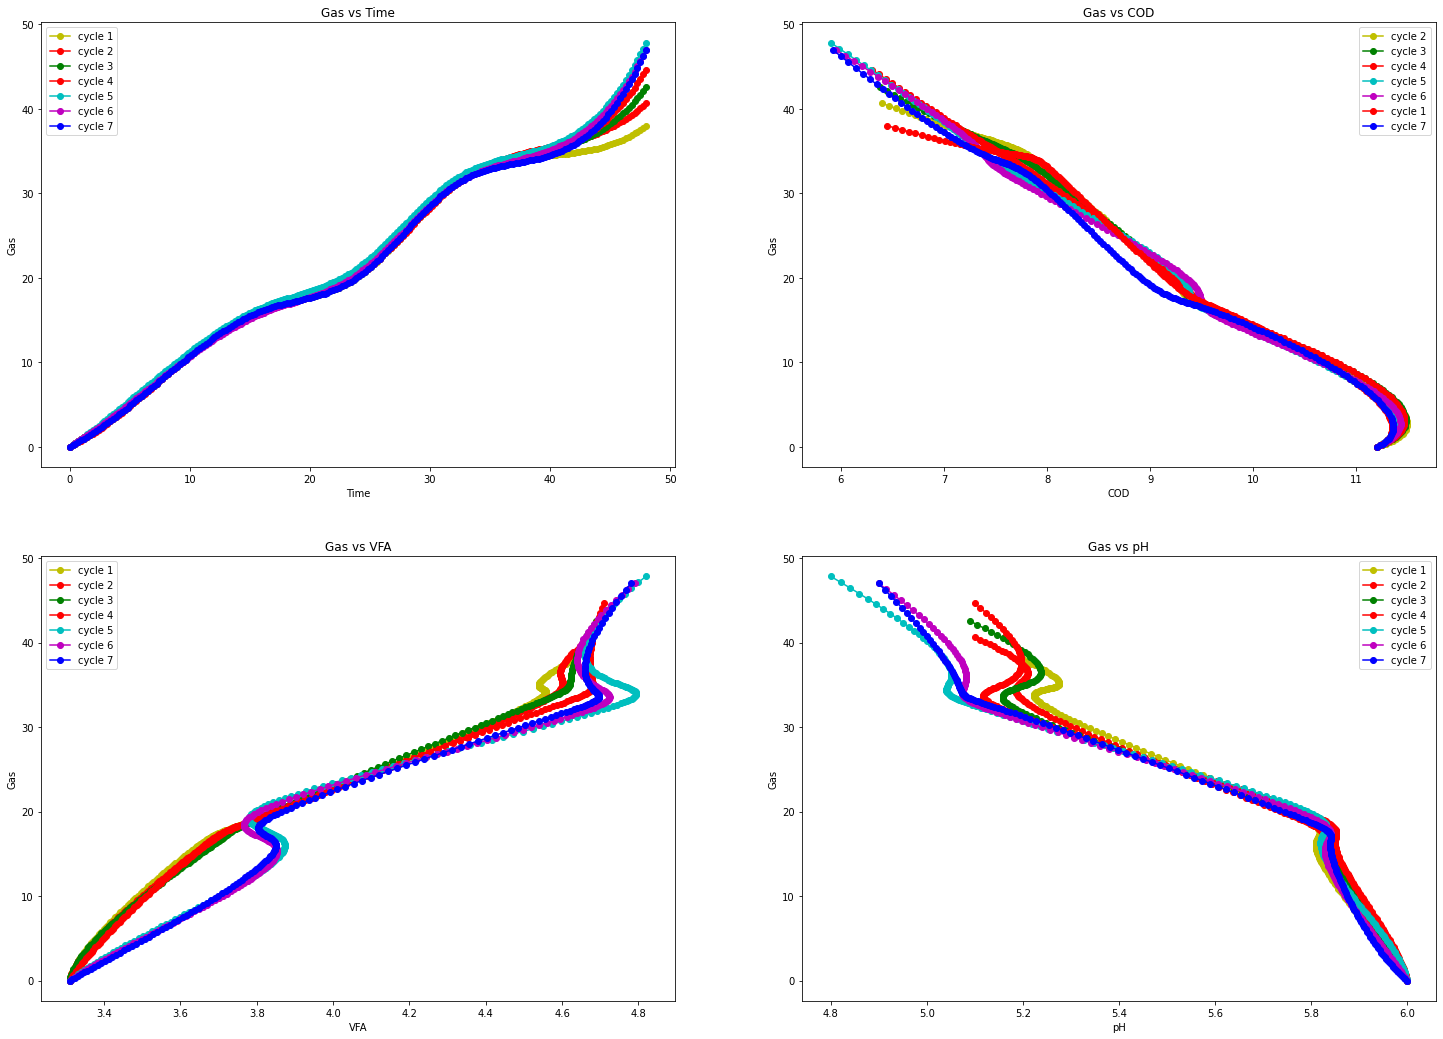

In [56]:
fig = plt.figure()


fig.set_figwidth(25)
fig.set_figheight(18)

ax1 = fig.add_subplot(221)
x1_plot_time=new_cyc1['time']
x2_plot_time=new_cyc2['time']
x3_plot_time=new_cyc3['time']
x4_plot_time=new_cyc4['time']
x5_plot_time=new_cyc5['time']
x6_plot_time=new_cyc6['time']
x7_plot_time=new_cyc7['time']
y1_plot=new_cyc1['Gas']
y2_plot=new_cyc2['Gas']
y3_plot=new_cyc3['Gas']
y4_plot=new_cyc4['Gas']
y5_plot=new_cyc5['Gas']
y6_plot=new_cyc6['Gas']
y7_plot=new_cyc7['Gas']

ax1.plot(x1_plot_time, y1_plot, c='y', marker="o", label='cycle 1')
ax1.plot(x2_plot_time, y2_plot, c='r', marker="o", label='cycle 2')
ax1.plot(x3_plot_time, y3_plot, c='g', marker="o", label='cycle 3')
ax1.plot(x4_plot_time, y4_plot, c='r', marker="o", label='cycle 4')
ax1.plot(x5_plot_time, y5_plot, c='c', marker="o", label='cycle 5')
ax1.plot(x6_plot_time, y6_plot, c='m', marker="o", label='cycle 6')
ax1.plot(x7_plot_time, y7_plot, c='b', marker="o", label='cycle 7')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Gas')
plt.title('Gas vs Time')

ax2 = fig.add_subplot(222)
x1_plot_cod=new_cyc1['COD']
x2_plot_cod=new_cyc2['COD']
x3_plot_cod=new_cyc3['COD']
x4_plot_cod=new_cyc4['COD']
x5_plot_cod=new_cyc5['COD']
x6_plot_cod=new_cyc6['COD']
x7_plot_cod=new_cyc7['COD']

ax2.plot(x2_plot_cod, y2_plot, c='y', marker="o", label='cycle 2')
ax2.plot(x3_plot_cod, y3_plot, c='g', marker="o", label='cycle 3')
ax2.plot(x4_plot_cod, y4_plot, c='r', marker="o", label='cycle 4')
ax2.plot(x5_plot_cod, y5_plot, c='c', marker="o", label='cycle 5')
ax2.plot(x6_plot_cod, y6_plot, c='m', marker="o", label='cycle 6')
ax2.plot(x1_plot_cod, y1_plot, c='r', marker="o", label='cycle 1')
ax2.plot(x7_plot_cod, y7_plot, c='b', marker="o", label='cycle 7')
plt.legend(loc='upper right')
plt.xlabel('COD')
plt.ylabel('Gas')
plt.title('Gas vs COD')

ax3 = fig.add_subplot(223)
x1_plot_vfa=new_cyc1['VFA']
x2_plot_vfa=new_cyc2['VFA']
x3_plot_vfa=new_cyc3['VFA']
x4_plot_vfa=new_cyc4['VFA']
x5_plot_vfa=new_cyc5['VFA']
x6_plot_vfa=new_cyc6['VFA']
x7_plot_vfa=new_cyc7['VFA']

ax3.plot(x1_plot_vfa, y1_plot, c='y', marker="o", label='cycle 1')
ax3.plot(x2_plot_vfa, y2_plot, c='r', marker="o", label='cycle 2')
ax3.plot(x3_plot_vfa, y3_plot, c='g', marker="o", label='cycle 3')
ax3.plot(x4_plot_vfa, y4_plot, c='r', marker="o", label='cycle 4')
ax3.plot(x5_plot_vfa, y5_plot, c='c', marker="o", label='cycle 5')
ax3.plot(x6_plot_vfa, y6_plot, c='m', marker="o", label='cycle 6')
ax3.plot(x7_plot_vfa, y7_plot, c='b', marker="o", label='cycle 7')
plt.legend(loc='upper left')
plt.xlabel('VFA')
plt.ylabel('Gas')
plt.title('Gas vs VFA')

ax4 = fig.add_subplot(224)
x1_plot_ph=new_cyc1['pH']
x2_plot_ph=new_cyc2['pH']
x3_plot_ph=new_cyc3['pH']
x4_plot_ph=new_cyc4['pH']
x5_plot_ph=new_cyc5['pH']
x6_plot_ph=new_cyc6['pH']
x7_plot_ph=new_cyc7['pH']

ax4.plot(x1_plot_ph, y1_plot, c='y', marker="o", label='cycle 1')
ax4.plot(x2_plot_ph, y2_plot, c='r', marker="o", label='cycle 2')
ax4.plot(x3_plot_ph, y3_plot, c='g', marker="o", label='cycle 3')
ax4.plot(x4_plot_ph, y4_plot, c='r', marker="o", label='cycle 4')
ax4.plot(x5_plot_ph, y5_plot, c='c', marker="o", label='cycle 5')
ax4.plot(x6_plot_ph, y6_plot, c='m', marker="o", label='cycle 6')
ax4.plot(x7_plot_ph, y7_plot, c='b', marker="o", label='cycle 7')
plt.legend(loc='upper right')
plt.xlabel('pH')
plt.ylabel('Gas')
plt.title('Gas vs pH')

plt.show()

